In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Projects/ML/MLAll/Diabetes.csv")

In [4]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
df.describe(include='all')

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [8]:
df.shape

(768, 9)

In [9]:
(df['Glucose'].isnull().sum()/df['Glucose'].shape[0])*100

np.float64(0.6510416666666667)

- Glucose column has 0.65% of missing values. So, we can replace the null values with some techniques.

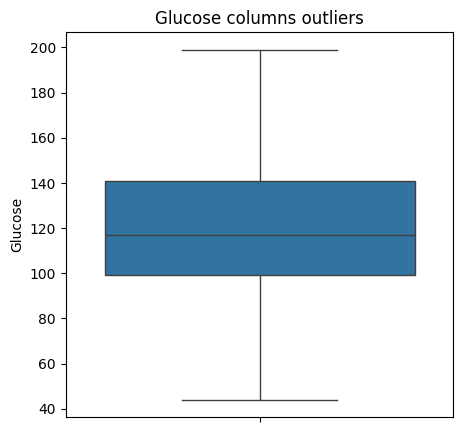

In [10]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['Glucose'],ax=ax)
plt.title("Glucose columns outliers")
plt.show()

- In Glucose column, we are not having any outliers so we can replace the null values with measure of central tendency methods like.
- Mean
- Median
- Mode

## Fillna() :-

In [11]:
df['Glucose_new']=df['Glucose'].fillna(df['Glucose'].median())

In [12]:
df['Glucose_new'].isnull().sum()

np.int64(0)

## Replace() :-

In [13]:
df['Glucose_new1']=df['Glucose'].replace(to_replace=np.nan,value=df['Glucose'].median())

In [14]:
df['Glucose_new1'].isnull().sum()

np.int64(0)

## Interpolation() :-

In [15]:
df['Glucose_new2']=df['Glucose'].interpolate()

In [16]:
df['Glucose_new2'].isnull().sum()

np.int64(0)

## Nan_to_num() :-

In [17]:
df['Glucose_new_nan']=np.nan_to_num(df['Glucose'],nan=df['Glucose'].median())

In [18]:
df['Glucose_new_nan'].isnull().sum()

np.int64(0)

## SimpleImputer() :-

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['Glucose_imputer'] = imputer.fit_transform(df[['Glucose']])

In [20]:
df['Glucose_imputer'].isnull().sum()

np.int64(0)

In [21]:
from sklearn.impute import KNNImputer

imput=KNNImputer(n_neighbors=2)
df['Glucose_knn']=imput.fit_transform(df[['Glucose']])

In [22]:
df['Glucose_knn'].isnull().sum()

np.int64(0)

## Manual:-

In [23]:
dd=pd.DataFrame({'inputvalue':[100,np.nan,120,130,np.nan,150,160,np.nan,180,190,np.nan,210]})

In [24]:
dd

,inputvalue
0,100.0
1,NaN
2,120.0
3,130.0
4,NaN
5,150.0
6,160.0
7,NaN
8,180.0
9,190.0


In [25]:
dd.shape

(12, 1)

In [26]:
dd.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
inputvalue,8.0,155.0,37.416574,100.0,127.5,155.0,182.5,210.0


In [27]:
dd.isnull().sum()

inputvalue    4
dtype: int64

In [28]:
(dd.isnull().sum()/dd.shape[0])*100

inputvalue    33.333333
dtype: float64

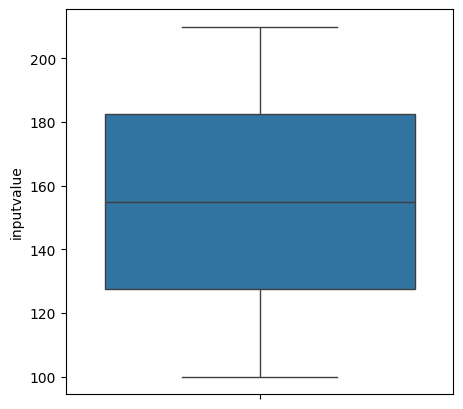

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(dd['inputvalue'],ax=ax)
plt.show()

In [3]:
dd1=pd.DataFrame({'text':['male',np.nan,'male','female',np.nan,'female','male','female',np.nan,'female']})

In [4]:
dd1

,text
0,male
1,NaN
2,male
3,female
4,NaN
5,female
6,male
7,female
8,NaN
9,female


In [5]:
dd1.isnull().sum()

text    3
dtype: int64

In [6]:
dd1.value_counts()

text  
female    4
male      3
Name: count, dtype: int64

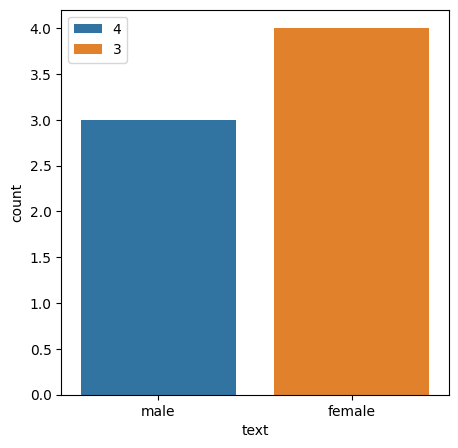

In [7]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=dd1,x=dd1['text'],ax=ax,hue='text')
plt.legend(dd1['text'].unique())
plt.legend(dd1['text'].value_counts())
plt.show()

C:\Users\Archana Siripuram\AppData\Local\Temp\ipykernel_18696\186104609.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


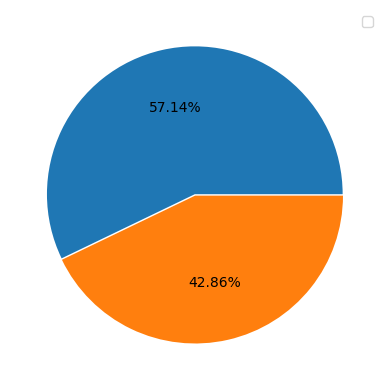

In [8]:
plt.pie(x=dd1['text'].value_counts(),explode=[0,0.01],autopct='%0.2f%%')
plt.legend()
plt.show()

## Fillna() :-

In [30]:
dd['filna_new']=dd['inputvalue'].fillna(dd['inputvalue'].mean())
dd['filna_new']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: filna_new, dtype: float64

In [31]:
dd['filna_new1']=dd['inputvalue'].fillna(dd['inputvalue'].median())
dd['filna_new1']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: filna_new1, dtype: float64

In [9]:
dd1['fil_text1']=dd1['text'].fillna(dd1['text'].mode()[0])
dd1['fil_text1']

0      male
1    female
2      male
3    female
4    female
5    female
6      male
7    female
8    female
9    female
Name: fil_text1, dtype: object

In [10]:
dd1['fil_text2']=dd1['text'].fillna('male')
dd1['fil_text2']

0      male
1      male
2      male
3    female
4      male
5    female
6      male
7    female
8      male
9    female
Name: fil_text2, dtype: object

## Replace() :-

In [32]:
dd['replace_new']=dd['inputvalue'].replace(to_replace=np.nan,value=dd['inputvalue'].mean())
dd['replace_new']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: replace_new, dtype: float64

In [33]:
dd['replace_new1']=dd['inputvalue'].replace(to_replace=np.nan,value=dd['inputvalue'].median())
dd['replace_new1']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: replace_new1, dtype: float64

In [11]:
dd1['rep_text1']=dd1['text'].replace(to_replace=np.nan,value=dd1['text'].mode()[0])
dd1['rep_text1']

0      male
1    female
2      male
3    female
4    female
5    female
6      male
7    female
8    female
9    female
Name: rep_text1, dtype: object

## Interpolation() :-

In [34]:
dd['interpolate_new']=dd['inputvalue'].interpolate(limit=2,limit_direction='forward')
dd['interpolate_new']

0     100.0
1     110.0
2     120.0
3     130.0
4     140.0
5     150.0
6     160.0
7     170.0
8     180.0
9     190.0
10    200.0
11    210.0
Name: interpolate_new, dtype: float64

In [35]:
dd['interpolate_new1']=dd['inputvalue'].interpolate(limit=2,limit_direction='both')
dd['interpolate_new1']

0     100.0
1     110.0
2     120.0
3     130.0
4     140.0
5     150.0
6     160.0
7     170.0
8     180.0
9     190.0
10    200.0
11    210.0
Name: interpolate_new1, dtype: float64

In [36]:
dd['interpolate_new2']=dd['inputvalue'].interpolate(limit=4,limit_direction='both')
dd['interpolate_new2']

0     100.0
1     110.0
2     120.0
3     130.0
4     140.0
5     150.0
6     160.0
7     170.0
8     180.0
9     190.0
10    200.0
11    210.0
Name: interpolate_new2, dtype: float64

In [12]:
dd1['map_text']=dd1['text'].map(lambda x:1 if x=='male' else (0 if x=='female' else np.nan))
dd1['map_text']

0    1.0
1    NaN
2    1.0
3    0.0
4    NaN
5    0.0
6    1.0
7    0.0
8    NaN
9    0.0
Name: map_text, dtype: float64

In [13]:
dd1['map_text1']=dd1['text'].map({'male':1,'female':0})
dd1['map_text1']

0    1.0
1    NaN
2    1.0
3    0.0
4    NaN
5    0.0
6    1.0
7    0.0
8    NaN
9    0.0
Name: map_text1, dtype: float64

In [14]:
dd1['int_text']=dd1['map_text1'].interpolate(limit=2,limit_direction='both')
dd1['int_text']

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    0.0
Name: int_text, dtype: float64

## Numpy:-

In [37]:
dd['numpy_new']=np.nan_to_num(dd['inputvalue'],nan=dd['inputvalue'].mean())
dd['numpy_new']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: numpy_new, dtype: float64

In [38]:
dd['numpy_new1']=np.nan_to_num(dd['inputvalue'],nan=dd['inputvalue'].median())
dd['numpy_new1']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: numpy_new1, dtype: float64

## Simple Imputer() :-

In [39]:
simputer=SimpleImputer(missing_values=np.nan,strategy='mean')
dd['simple_imp']=simputer.fit_transform(dd[['inputvalue']])
dd['simple_imp']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: simple_imp, dtype: float64

In [40]:
simputer1=SimpleImputer(missing_values=np.nan,strategy='median')
dd['simple_imp1']=simputer1.fit_transform(dd[['inputvalue']])
dd['simple_imp1']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: simple_imp1, dtype: float64

## KNN Imputer() :-

In [41]:
knnimp=KNNImputer(missing_values=np.nan,n_neighbors=2,weights='uniform')
dd['knn_imp']=knnimp.fit_transform(dd[['inputvalue']])
dd['knn_imp']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: knn_imp, dtype: float64

In [42]:
knnimp1=KNNImputer(n_neighbors=2)
dd['knn_imp1']=knnimp1.fit_transform(dd[['inputvalue']].interpolate())
dd['knn_imp1']

0     100.0
1     155.0
2     120.0
3     130.0
4     155.0
5     150.0
6     160.0
7     155.0
8     180.0
9     190.0
10    155.0
11    210.0
Name: knn_imp1, dtype: float64